# Well-Data Visualization and Lithology Prediction with Machine learning(KNN, Random Forest ,Decision Tree)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lasio
import pandas_profiling
import petroeval as pet
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import missingno as msno

In [2]:
# df=las.df().reset_index()
train=pd.read_csv("train.csv",sep=";")

train.rename(columns = {"FORCE_2020_LITHOFACIES_LITHOLOGY":"FACIES"}, inplace = True)
pd.set_option('display.max_rows', None)


In [3]:
# train.head()

In [4]:
#############################################################################################################################

In [5]:
# print(f'Number of wells in train data: {len(np.unique(train.WELL))}')

In [6]:
# labels = dict(train.FACIES.value_counts())
# labels

In [7]:
# facies_names = ['Shale', 'Sandstone', 'SS/Shale', 'Marl', 
#                      'Dolomite', 'Limestone', 'Chalk', 'Halite', 'Anhydrite', 
#                      'Tuff', 'Coal', 'Basement']

In [8]:
traindata=train.loc[train.WELL =='15/9-15']
# traindata=train.loc[train.WELL=='']

In [9]:
print(traindata.shape)

# traindata.tail(1)

(17717, 29)


In [10]:
#############################################################################################################################

In [11]:
# traindata.isna().sum()

In [12]:
# msno.bar(traindata)

In [13]:
traindata = traindata[['DEPTH_MD','GR','SP','RHOB', 'DTC','NPHI','FACIES','CALI','RSHA','RMED','RDEP','PEF','ROP','DRHO','MUDWEIGHT','RXO']]

In [14]:
# msno.bar(traindata)

In [15]:
# msno.matrix(traindata)

In [16]:
traindata=traindata.interpolate(method='linear',limit_direction='backward') #fillna(traindata.mean())

In [17]:
traindata.shape

(17717, 16)

In [18]:
traindata.dropna(inplace=True)

In [19]:
traindata.shape

(17708, 16)

In [20]:
traindata.isna().sum()

DEPTH_MD     0
GR           0
SP           0
RHOB         0
DTC          0
NPHI         0
FACIES       0
CALI         0
RSHA         0
RMED         0
RDEP         0
PEF          0
ROP          0
DRHO         0
MUDWEIGHT    0
RXO          0
dtype: int64

In [21]:
traindata.shape

(17708, 16)

In [22]:
###########################################################################################################################

In [23]:
traindata.head()

,DEPTH_MD,GR,SP,RHOB,DTC,NPHI,FACIES,CALI,RSHA,RMED,RDEP,PEF,ROP,DRHO,MUDWEIGHT,RXO
18270,485.256,78.275825,45.884998,1.9606,161.947510,0.54185,65000,19.388424,1.567587,1.567587,1.735962,155.216309,46.064972,-0.015832,0.133007,-999.900024
18271,485.408,79.214615,46.435825,1.9606,161.267715,0.54185,65000,19.388424,1.570050,1.570050,1.744778,155.216309,46.067581,-0.015832,0.133007,-999.900024
18272,485.560,79.724106,46.375412,1.9606,160.644363,0.54185,65000,19.388424,1.553659,1.553659,1.752990,155.216309,46.070087,-0.015832,0.133007,-999.900024
18273,485.712,81.042778,46.352402,1.9606,160.212601,0.54185,65000,19.388424,1.541216,1.541216,1.760675,155.216309,46.072601,-0.015832,0.133007,-999.900024
18274,485.864,80.785133,46.329601,1.9606,160.315948,0.54185,65000,19.388424,1.540456,1.540456,1.767360,155.216309,44.937218,-0.015832,0.133007,-999.900024


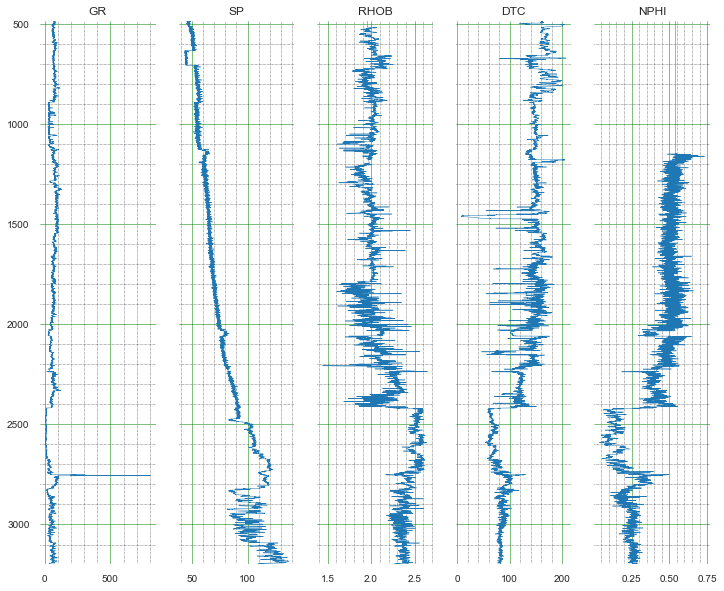

In [24]:
data = traindata[['DEPTH_MD', 'GR','SP','RHOB', 'DTC','NPHI']]
data = data.values
rows, cols = 1,5
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
mnemonics = [ 'GR','SP','RHOB', 'DTC','NPHI']
for i in range(cols):
    ax[i].plot(data[:,i+1], data[:,0],linewidth='0.5')
    ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
    ax[i].set_title('%s' %mnemonics[i])

In [25]:
k=dict(traindata.FACIES.value_counts())
k

{65000: 10872,
 30000: 2713,
 65030: 1729,
 70032: 969,
 70000: 905,
 80000: 385,
 99000: 135}

In [26]:
facies=traindata['FACIES']
facies_numbers = {30000: 0,65030: 1,65000: 2,80000: 3,74000: 4,70000: 5,70032: 6,88000: 7,86000: 8,99000: 9,90000: 10,93000: 11}
facies = facies.map(facies_numbers)
facies.value_counts()

2    10872
0     2713
1     1729
6      969
5      905
3      385
9      135
Name: FACIES, dtype: int64

In [27]:
traindata.shape

(17708, 16)

In [28]:
facies.head()

18270    2
18271    2
18272    2
18273    2
18274    2
Name: FACIES, dtype: int64

In [29]:
Y_train=facies

In [30]:
facies=facies.values

In [31]:
traindata.shape

(17708, 16)

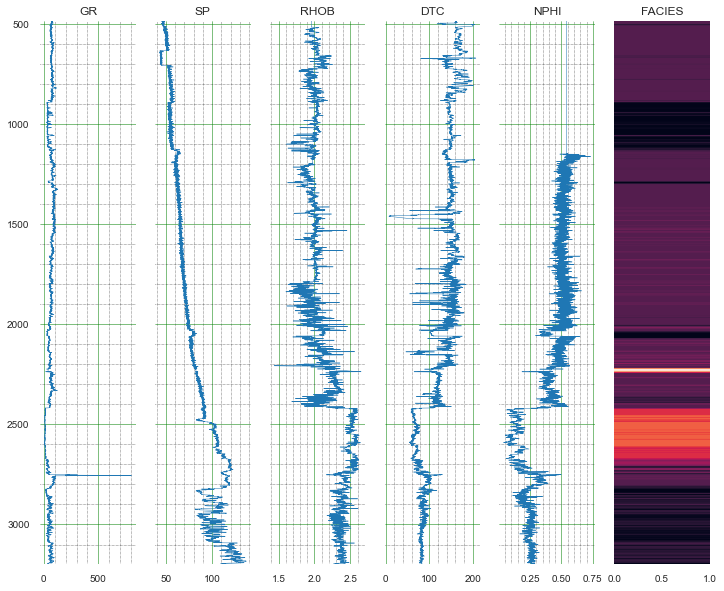

In [32]:
# depth = traindata.DEPTH_MD.values
data = traindata.values
rows, cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
mnemonics = ['GR','SP','RHOB', 'DTC','NPHI','FACIES']
for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[:,i+1], data[:,0],linewidth='0.5')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]))
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
        ax[i].set_title('%s' %mnemonics[i])
    elif i ==cols-1:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('%s' % mnemonics[i])

In [33]:
df=traindata

In [34]:
# traindata.isna().sum()

In [35]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import  StandardScaler
import seaborn as sns
from sklearn.impute import KNNImputer

In [36]:
Y_train=Y_train
X_train=traindata[['DEPTH_MD','GR','SP','RHOB', 'DTC','NPHI','CALI','RSHA','RMED','RDEP','ROP','DRHO','MUDWEIGHT']]

In [37]:
# traindata.columns.to_list()

In [38]:
# traindata.shape

In [39]:
# X_train.head()

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [41]:
X_train.shape

(17708, 13)

In [42]:
X_train=X_train.values
Y_train=Y_train.values

In [43]:
# imputer=KNNImputer(n_neighbors=3)
# X_train=imputer.fit_transform(X_train)

In [44]:
X_train = StandardScaler().fit(X_train).transform(X_train.astype(float))

KNN 

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [45]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
#                'weights' : ['uniform','distance'],
#                'metric' : ['minkowski','euclidean','manhattan']}

In [46]:
# gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [47]:
# g_res = gs.fit(X_train,Y_train)

In [48]:
# g_res.best_estimator_

In [49]:
# model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#                      metric_params=None, n_jobs=None, n_neighbors=15, p=2,
#                      weights='uniform')
# model.fit(X_train,Y_train) 

DecisionTreeClassifier


///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [50]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

In [51]:
# params = {
#     'max_depth': [2, 3, 5, 10, 20],
#     'min_samples_leaf': [5, 10, 20, 50, 100],
#     'criterion': ["gini", "entropy"]
# }

In [52]:
# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [53]:
# grid_search.fit(X_train, Y_train)

In [54]:
# grid_search.best_estimator_

In [55]:

# DTClassifier= DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
#                        max_depth=2, max_features=None, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=5, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, presort='deprecated',
#                        random_state=42, splitter='best')
# DTClassifier.fit(X_train,Y_train) ;

RANDOM FOREST


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [56]:
param_grid = {'n_estimators':[int(x) for x in np.linspace(start = 50, stop = 200, num = 10)],
               'max_features':['auto', 'sqrt'],
               'max_depth': [2,4],
               'min_samples_split': [2, 5],
               'min_samples_leaf':[1, 2],
               'bootstrap': [True, False]}

In [57]:
rf_Model = RandomForestClassifier()
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [58]:
rf_RandomGrid.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   53.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [59]:
rf_RandomGrid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
clf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(X_train,Y_train) 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
#########################################################################################################################

Prediction

In [65]:
X_Test=X_train

In [66]:
############################################################################################################################

In [73]:
y_pred = clf.predict(X_Test)

In [74]:
# y_pred=DTClassifier.predict(X_Test)

In [75]:
# y_pred=clf.predict(X_Test)

In [76]:
###############################################################################################################################

Visualization

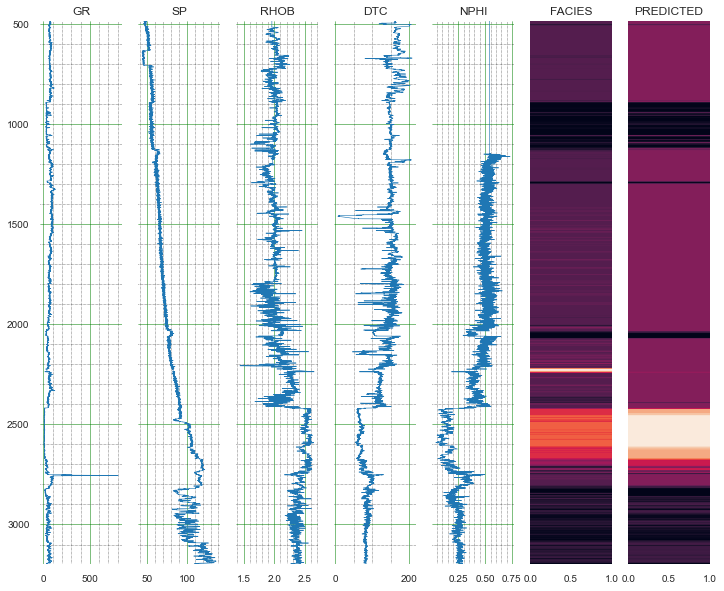

In [77]:
# Depth = df.DEPTH_MD.values
Data = df.values
rows, cols = 1,7
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
mnemonics = ['GR','SP','RHOB', 'DTC','NPHI','FACIES']
for i in range(cols):
    if i < cols-2:
        ax[i].plot(Data[:,i+1],Data[:,0], linewidth=0.6)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(Data[:, 0]), min(Data[:, 0]), 0)
        ax[i].set_title('%s' %mnemonics[i])
    elif i==cols-2:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(Data[:, 0]), min(Data[:, 0])])
        ax[i].set_title('%s' % mnemonics[i])
    elif i==cols-1:
        F = np.vstack((y_pred,y_pred)).T
        m = ax[i].imshow(F, aspect='auto', extent=[0,1,max(Data[:,0]), min(Data[:,0])])
        ax[i].set_title('PREDICTED')

In [78]:
from sklearn import metrics

print("Test set Accuracy: ", metrics.accuracy_score(Y_train, y_pred))


Test set Accuracy:  0.8966004065958889


Let Tese the Model for Test Data



///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [79]:
df_test= pd.read_csv('test_features.csv.txt', sep=';')
# df.rename(columns = {"FORCE_2020_LITHOFACIES_LITHOLOGY":"FACIES"}, inplace = True)
ddf=df_test.loc[df_test.WELL == '15/9-14']
test=ddf


In [80]:
ddf.shape

(20281, 27)

In [81]:
df_target=pd.read_csv('test_target.csv.txt', sep=';')
df_target.rename(columns = {"FORCE_2020_LITHOFACIES_LITHOLOGY":"FACIES"}, inplace = True)
cdf=df_target.loc[df_target.WELL == '15/9-14']

In [82]:
cdf.shape

(20281, 3)

In [83]:
# ddf.head()

In [84]:
# test.head()

In [85]:
# msno.bar(test)

In [86]:
test=test[['DEPTH_MD','GR','SP','RHOB', 'DTC','NPHI','CALI','RSHA','RMED','RDEP','ROP','DRHO','MUDWEIGHT']]
          #[['DEPTH_MD','GR','SP','RHOB', 'DTC','NPHI','CALI','RSHA','RMED','RDEP','ROP','DRHO','MUDWEIGHT']]

In [87]:
test.shape

(20281, 13)

In [88]:
cdf.drop('DEPTH_MD', inplace=True, axis=1)

In [89]:
df_concat = pd.concat([test, cdf], axis=1)

In [90]:
# df_concat.head()

In [91]:
df_concat=df_concat.interpolate(method='linear',limit_direction='backward') #fillna(traindata.mean())fillna(df_concat.mean())#interpolate(method='linear',limit_direction='backward')
df_concat.dropna(inplace=True)

In [92]:
X_test=df_concat[['DEPTH_MD','GR','SP','RHOB', 'DTC','NPHI','CALI','RSHA','RMED','RDEP','ROP','DRHO','MUDWEIGHT']]
Y_test=df_concat['FACIES']

In [93]:
print(X_test.shape,Y_test.shape)

(20223, 13) (20223,)


In [94]:
test_facies=Y_test
test_facies_numbers = {30000: 0,65030: 1,65000: 2,80000: 3,74000: 4,70000: 5,70032: 6,88000: 7,86000: 8,99000: 9,90000: 10,93000: 11}
test_facies = test_facies.map(test_facies_numbers)
test_facies.value_counts()

1     6468
2     6070
0     4395
5     1699
3      649
6      625
9      233
10      84
Name: FACIES, dtype: int64

In [95]:
X_test=X_test.values
Y_test=Y_test.values

In [96]:
Y_test.shape

(20223,)

In [97]:
X_test.shape

(20223, 13)

In [98]:
# X_test

In [99]:
X_test = StandardScaler().fit(X_test).transform(X_test.astype(float))

________________________________________________________________________________________________________________________________

In [101]:
y_hat=clf.predict(X_test)

________________________________________________________________________________________________________________________________

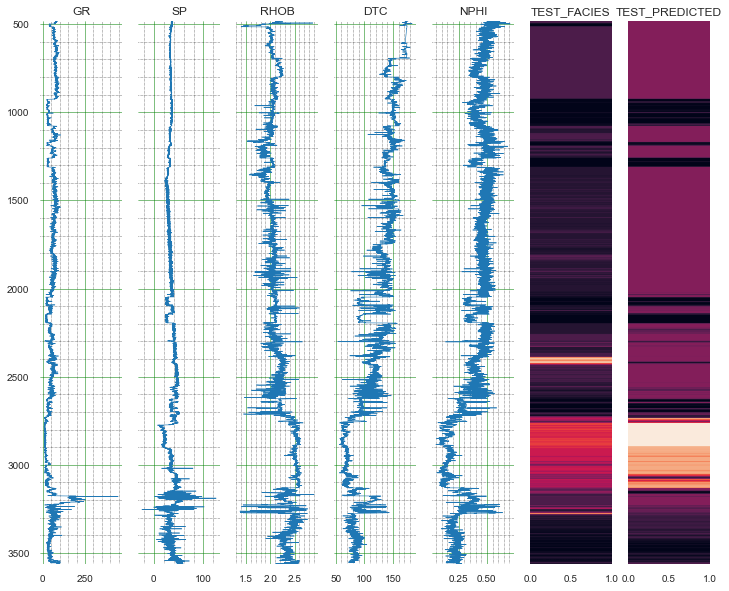

In [102]:
# depth = test.DEPTH_MD.values
data_test = test.values
rows, cols = 1,7
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
mnemonics = ['GR','SP','RHOB', 'DTC','NPHI','TEST_FACIES']
for i in range(cols):
    if i < cols-2:
        ax[i].plot(data_test[:,i+1],data_test[:,0], linewidth=0.6)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data_test[:, 0]), min(data_test[:, 0]), 0)
        ax[i].set_title('%s' %mnemonics[i])
    elif i==cols-2:
        F = np.vstack((test_facies,test_facies)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data_test[:, 0]), min(data_test[:, 0])])
        ax[i].set_title('%s' % mnemonics[i])
    elif i==cols-1:
        F = np.vstack((y_hat,y_hat)).T
        m = ax[i].imshow(F, aspect='auto', extent=[0,1,max(data_test[:,0]), min(data_test[:,0])])
        ax[i].set_title('TEST_PREDICTED')

In [103]:
from sklearn import metrics

print("Test set Accuracy: ", metrics.accuracy_score(test_facies, y_hat))

Test set Accuracy:  0.5484843989516887
